# EDA

Created: 2022.05.25 <br>
Lecture: [Full Stack Deep Learning (2021), online course](https://fullstackdeeplearning.com/) <br>

**NoteBook Author** : [Janghoo Lee](https://davincijang.space/) <br>
🐈 : [ProtossDragoon](https://github.com/ProtossDragoon) <br>
📧 : dlwkdgn1@naver.com <br>

In [1]:
import json
with open('../data/sample/sample.json', 'r') as f:
    _data = json.load(f)

# json 은 기본적으로 dict 형식으로 로드됨. 어떤 키를 가지고 있는지 확인.
print(_data.keys())
print(type(_data['numberOfItems']), ':', _data['numberOfItems'])
print(type(_data['data']))
data = _data['data']

dict_keys(['numberOfItems', 'data'])
<class 'int'> : 17991
<class 'list'>


In [2]:
# 데이터의 각 요소들이 어떤 정보를 담고 있는지 확인.
import pprint
pprint.pprint(data[0]['header'])
# header 은 대화 그 자체에 대한 메타데이터와 클래스를 담고 있음.

{'dialogueInfo': {'dialogueID': '8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9',
                  'numberOfParticipants': 2,
                  'numberOfTurns': 6,
                  'numberOfUtterances': 20,
                  'topic': '개인 및 관계',
                  'type': '일상 대화'},
 'participantsInfo': [{'age': '20대',
                       'gender': '남성',
                       'participantID': 'P01',
                       'residentialProvince': '대구광역시'},
                      {'age': '20대',
                       'gender': '여성',
                       'participantID': 'P02',
                       'residentialProvince': '경상남도'}]}


In [3]:
pprint.pprint(data[0]['body'])
# body 는 말풍선 그 자체에 대한 정보를 담고 있음. 
# 말풍선 각각이 누구의 발화인지, 언제 한 발화인지에 대한 정보가 여기에 포함됨.

[{'date': '2020-08-16',
  'participantID': 'P01',
  'time': '10:37:00',
  'turnID': 'T1',
  'utterance': '몇시까지먹엇는데?',
  'utteranceID': 'U1'},
 {'date': '2020-08-16',
  'participantID': 'P02',
  'time': '10:45:00',
  'turnID': 'T2',
  'utterance': '저때',
  'utteranceID': 'U2'},
 {'date': '2020-08-16',
  'participantID': 'P02',
  'time': '10:45:00',
  'turnID': 'T2',
  'utterance': '집 도착해ㅆ을 걸',
  'utteranceID': 'U3'},
 {'date': '2020-08-16',
  'participantID': 'P02',
  'time': '10:45:00',
  'turnID': 'T2',
  'utterance': '#@이름#이랑 둘이서 있을줄이야',
  'utteranceID': 'U4'},
 {'date': '2020-08-16',
  'participantID': 'P02',
  'time': '10:45:00',
  'turnID': 'T2',
  'utterance': '#@기타# ..',
  'utteranceID': 'U5'},
 {'date': '2020-08-16',
  'participantID': 'P01',
  'time': '10:47:00',
  'turnID': 'T3',
  'utterance': '다른애들은??',
  'utteranceID': 'U6'},
 {'date': '2020-08-16',
  'participantID': 'P02',
  'time': '10:48:00',
  'turnID': 'T4',
  'utterance': '애들 걍 갔음',
  'utteranceID': 'U7'},
 {'date': 

In [4]:
# json 형태로 관찰하는 것보다는 DataFrame 형태로 보기 편할 것 같음.
import pandas as pd
body = pd.DataFrame(data[0]['body'])
body

,utteranceID,turnID,participantID,date,time,utterance
0,U1,T1,P01,2020-08-16,10:37:00,몇시까지먹엇는데?
1,U2,T2,P02,2020-08-16,10:45:00,저때
2,U3,T2,P02,2020-08-16,10:45:00,집 도착해ㅆ을 걸
3,U4,T2,P02,2020-08-16,10:45:00,#@이름#이랑 둘이서 있을줄이야
4,U5,T2,P02,2020-08-16,10:45:00,#@기타# ..
5,U6,T3,P01,2020-08-16,10:47:00,다른애들은??
6,U7,T4,P02,2020-08-16,10:48:00,애들 걍 갔음
7,U8,T4,P02,2020-08-16,10:48:00,오빠가고나서
8,U9,T4,P02,2020-08-16,10:48:00,그래서 #@이름#이랑
9,U10,T4,P02,2020-08-16,10:48:00,얘기 했는데


In [5]:
# 아직 DataFrame 에 header 의 정보가 포함되지 않았음. 이것을 합쳐 줄 것임.
# 합치기 전에, 존재하는 데이터들의 unique 값들이 무엇이 있는지 확인해 보려고 함.
label_li = []
for chatinfo in data:
    e = chatinfo['header']['dialogueInfo']
    label_li.append(tuple((e['topic'], e['type']))) # 대화주제(topic), 대화유형(type)
unique_labels = set(label_li)
print(f'{unique_labels}, ... total {len(unique_labels)} unique labels.')

{('상거래(쇼핑)', '토론 대화'), ('여가 생활', '토론 대화'), ('식음료', '일상 대화'), ('주거와 생활', '일상 대화'), ('개인 및 관계', '일상 대화'), ('일과 직업', '토론 대화'), ('주거와 생활', '토론 대화'), ('미용과 건강', '토론 대화'), ('시사/교육', '토론 대화'), ('일과 직업', '일상 대화'), ('상거래(쇼핑)', '일상 대화'), ('여가 생활', '일상 대화'), ('식음료', '토론 대화'), ('개인 및 관계', '토론 대화'), ('행사', '일상 대화'), ('미용과 건강', '일상 대화'), ('시사/교육', '일상 대화')}, ... total 17 unique labels.


In [6]:
# 대화주제와 대화유형 사이에는 연관관계가 있을 것임.
# 연관관계가 존재하는지, 클래스 불균형이 존재하는지 확인
from collections import Counter
counter = Counter(label_li)
pprint.pprint(counter)

Counter({('개인 및 관계', '일상 대화'): 5752,
         ('주거와 생활', '일상 대화'): 2215,
         ('여가 생활', '일상 대화'): 2137,
         ('식음료', '일상 대화'): 1646,
         ('행사', '일상 대화'): 1588,
         ('상거래(쇼핑)', '일상 대화'): 1294,
         ('일과 직업', '일상 대화'): 1211,
         ('미용과 건강', '일상 대화'): 1116,
         ('시사/교육', '일상 대화'): 1010,
         ('주거와 생활', '토론 대화'): 6,
         ('상거래(쇼핑)', '토론 대화'): 5,
         ('식음료', '토론 대화'): 3,
         ('여가 생활', '토론 대화'): 3,
         ('일과 직업', '토론 대화'): 2,
         ('개인 및 관계', '토론 대화'): 1,
         ('미용과 건강', '토론 대화'): 1,
         ('시사/교육', '토론 대화'): 1})


In [7]:
# matplotlib 에서 한글이 깨지는 문제 해결을 위한 셀임.
# 나눔고딕 일반 폰트 설치 후 이 셀을 실행할 것
from matplotlib import font_manager, rc
font_path = './ttf/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<Figure size 936x576 with 0 Axes>

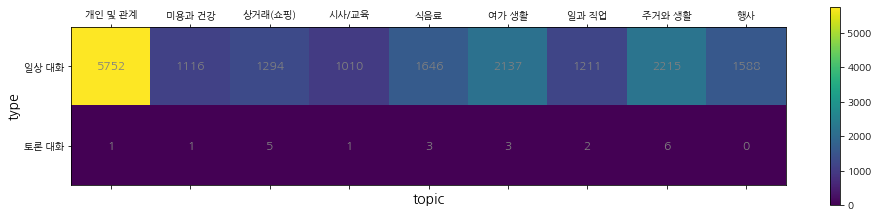

In [8]:
# heatmap 으로 클래스 불균형을 시각화.
import matplotlib.pyplot as plt
import numpy as np

def convert_counter_to_pivot_table(counter:Counter, row:str, col:str):
    li = []
    for k, v in dict(counter).items():
        li.append(list(k) + [v])
    df = pd.DataFrame(li, columns=[f'{col}', f'{row}', 'count'])
    df = pd.pivot(df, columns=[f'{col}'], index=[f'{row}'], values=['count'])
    df.fillna(0, inplace=True)
    vals = df.to_numpy().astype(np.uint32)
    return df, [e for _, e in df.columns], list(df.index), vals

row = 'type'
col = 'topic'
df, xticks, yticks, vals = convert_counter_to_pivot_table(counter, row, col)

plt.figure(figsize=[13,8])
plt.matshow(df)
plt.xticks(np.arange(len(xticks)), xticks)
plt.yticks(np.arange(len(yticks)), yticks)
plt.xlabel(f'{col}', fontsize=14)
plt.ylabel(f'{row}', fontsize=14)
for i in range(len(yticks)):
    for j in range(len(xticks)):
        text = plt.text(j, i, vals[i, j], ha='center', va='center', color='grey', size='large')
plt.colorbar()
plt.show()
# 클래스 불균형이 매우 심하다는 것을 알 수 있다.

(array([1.2635e+04, 1.9640e+03, 2.4720e+03, 4.1000e+01, 4.8700e+02,
        3.1800e+02, 1.1000e+01, 4.7000e+01, 1.0000e+01, 6.0000e+00]),
 array([20. , 23.5, 27. , 30.5, 34. , 37.5, 41. , 44.5, 48. , 51.5, 55. ]),
 <BarContainer object of 10 artists>)

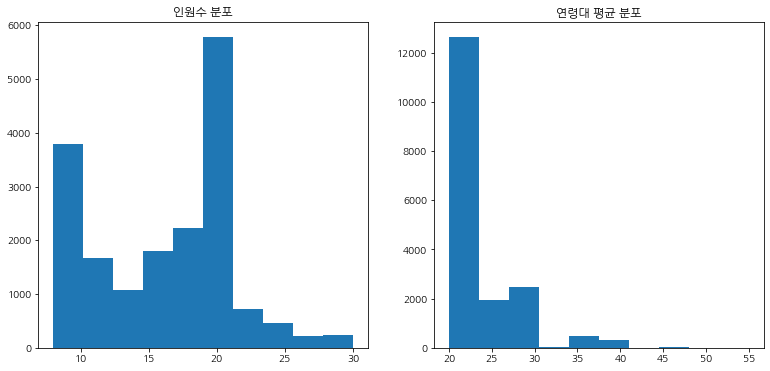

In [9]:
# 데이터셋에 존재하는 특징의 분포를 시각화
utterance_li = []
averageage_li = []
for chatinfo in data:
    e = chatinfo['header']['dialogueInfo']
    utterance_li.append(e['numberOfUtterances'])
    averageage = []
    for e in chatinfo['header']['participantsInfo']:
        averageage.append(int(e['age'][:2])) # e.g. '20대' = int('20')
    averageage_li.append(sum(averageage)/len(averageage))

plt.figure(figsize=[13,6])
plt.subplot(1,2,1,)
plt.title('인원수 분포')
plt.hist(utterance_li)
plt.subplot(1,2,2,)
plt.title('연령대 평균 분포')
plt.hist(averageage_li)

In [10]:
# 인원과 주제의 상관관계를 시각화
#TODO

In [11]:
# 성별과 주제의 상관관계를 시각화
#TODO

In [16]:
# dataframe 에 정보를 모두 담아넣는 작업
body['dialogue_dialogueID'] = '8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9'
body['dialogue_numberOfParticipants'] = int(2)
body['dialogue_numberOfTurns'] = int(6)
body['dialogue_numberOfUtterances'] = int(20)
body['dialogue_topic'] = '개인 및 관계' # 모든 데이터의 type 값을 '개인 및 관계' 로 통일함.
body.loc[body['participantID'] == 'P01', 'age'] = '20대'
body.loc[body['participantID'] == 'P01', 'gender'] = '남성'
body.loc[body['participantID'] == 'P01', 'residentialProvince'] = '대구광역시'
body.loc[body['participantID'] == 'P02', 'age'] = '20대'
body.loc[body['participantID'] == 'P02', 'gender'] = '여성'
body.loc[body['participantID'] == 'P02', 'residentialProvince'] = '경상남도'
body.head()

,utteranceID,turnID,participantID,date,time,utterance,dialogue_dialogueID,dialogue_numberOfParticipants,dialogue_numberOfTurns,dialogue_numberOfUtterances,dialogue_topic,age,gender,residentialProvince
0,U1,T1,P01,2020-08-16,10:37:00,몇시까지먹엇는데?,8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9,2,6,20,개인 및 관계,20대,남성,대구광역시
1,U2,T2,P02,2020-08-16,10:45:00,저때,8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9,2,6,20,개인 및 관계,20대,여성,경상남도
2,U3,T2,P02,2020-08-16,10:45:00,집 도착해ㅆ을 걸,8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9,2,6,20,개인 및 관계,20대,여성,경상남도
3,U4,T2,P02,2020-08-16,10:45:00,#@이름#이랑 둘이서 있을줄이야,8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9,2,6,20,개인 및 관계,20대,여성,경상남도
4,U5,T2,P02,2020-08-16,10:45:00,#@기타# ..,8e3c2186-7ffa-5f47-9d9a-29c0f8353dc9,2,6,20,개인 및 관계,20대,여성,경상남도


**여기까지 EDA 를 했을 때 예상되는 문제점은 다음과 같음.**
1. 실제 SNS 환경에서는 피처 `turnID`(대화의 의미 단위) 와 같은 정보가 제공되지 않음. 이것은 대화를 다시 의미 단위로 붙일 때 커다란 허들이 됨. 예를 들어, "나 화장실 가고 싶어" 를 "나" "화장실" "가고 싶어" 처럼 나누어 말하는 경향이 있음. 여러 발화자의 인터럽트가  들어가기 때문에, 발화를 의미 단위로 다시 붙이는 작업을 하기가 어려워짐.
2. 피처 `time`(발화 시간) 은 '시:분:초' 와 같은 형식인데, 이때 '초' 가 비어 있음. 실제 SNS 환경에서 읽어들일 수 있는 정보에 '초' 값은 제공되지 않을 가능성이 높음.
3. 피처 `dialogue_topic`(대화의 주제) 는 대화가 충분히 누적되었을 때 올바르게 추론할 수 있음.

정리하면, 얼마 단위로 대화를 구분할 수 있는지 판단하는 일이 어려울 것으로 예상됨.

In [ ]:
# 이번 프로젝트의 난이도를 너무 높이지 않도록 만들기 위해,
# turnID 를 어떤 방법으로든 습득할 수 있다는 것을 전제로 함.